<a href="https://colab.research.google.com/github/Yuvrajsrsingh/Flight_Price-Prediction_Model/blob/main/flight_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# For directly using dataset from drive

In [ ]:
#This code is useful for directly using csv from google drive link
!pip install -q gdown

import gdown
# https://docs.google.com/spreadsheets/d/1h5tBu96EOMgsnSzG8_FluDVvu8PDChCF/edit?usp=drive_link&ouid=112174980036121639447&rtpof=true&sd=true
file_id = '1h5tBu96EOMgsnSzG8_FluDVvu8PDChCF'
destination = 'city_day.csv'
file_i='1h0mHdlv-QYPe2Snjaxuq6DTAvPqTyCgZ'
# Create the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(download_url, destination, quiet=False)

# Load the CSV into a DataFrame
df = pd.read_excel(destination)

# Display the DataFrame
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1h5tBu96EOMgsnSzG8_FluDVvu8PDChCF
To: /content/city_day.csv
100%|██████████| 530k/530k [00:00<00:00, 13.3MB/s]


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


# Checking the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.shape

(10683, 11)

# Looking for null values

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# Furthur Data Preprocessing

In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


# Checking the data types

In [ ]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])
    # dff[col]=pd.to_datetime(dff[col])

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [ ]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [ ]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-30 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-30 05:50:00,2024-08-30 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-30 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-08-30 18:05:00,2024-08-30 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-08-30 16:50:00,2024-08-30 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2024-08-30 09:00:00,2024-08-30 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2024-08-30 18:55:00,2024-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,2024-08-30 08:00:00,2024-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2024-08-30 08:55:00,2024-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2024-08-30 11:25:00,2024-08-30 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [ ]:
df.drop('Date_of_Journey', axis=1, inplace=True)

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns¶

In [ ]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute


def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [ ]:
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [ ]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [ ]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration¶

In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [ ]:
df['Duration']=duration

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [ ]:
df['dur_hour']=df['Duration'].apply(hour)

In [ ]:
df['dur_min']=df['Duration'].apply(minutes)

In [ ]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [ ]:
drop_col(df,'Duration')

In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


In [ ]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [ ]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32





# Finding the categorical value

In [ ]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

# Finding the continuous value

In [ ]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

# **Handling categorical data**
We are using two main Encoding Techniques to covert Categorical data into some numerical format
Nominal data -- Data that are not in any order -->one hot encoding
ordinal data -- Data are in order --> labelEncoder¶

In [ ]:
categorical = df[column]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


# **Airline vs Price Analysis**

<Axes: xlabel='Airline', ylabel='Price'>

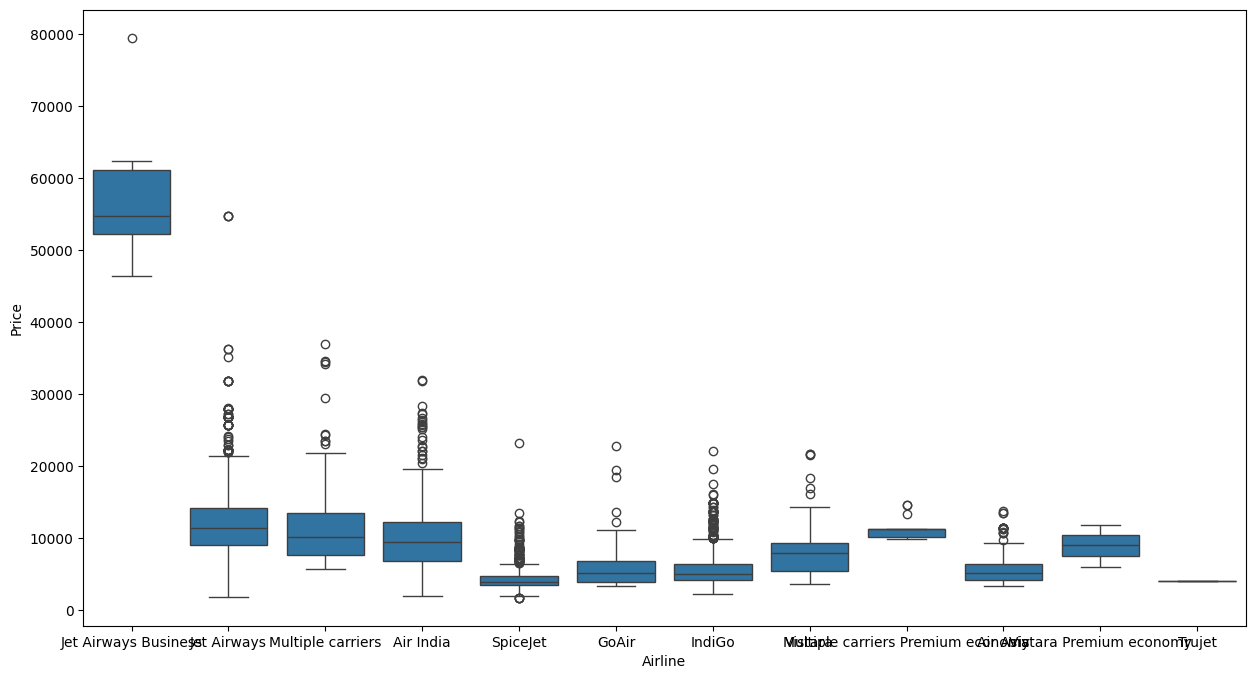

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

From graph we can see that Jet Airways Business have the highest Price. Apart from the first Airline almost all are having similar median

# Perform Total_Stops vs Price Analysis

<Axes: xlabel='Total_Stops', ylabel='Price'>

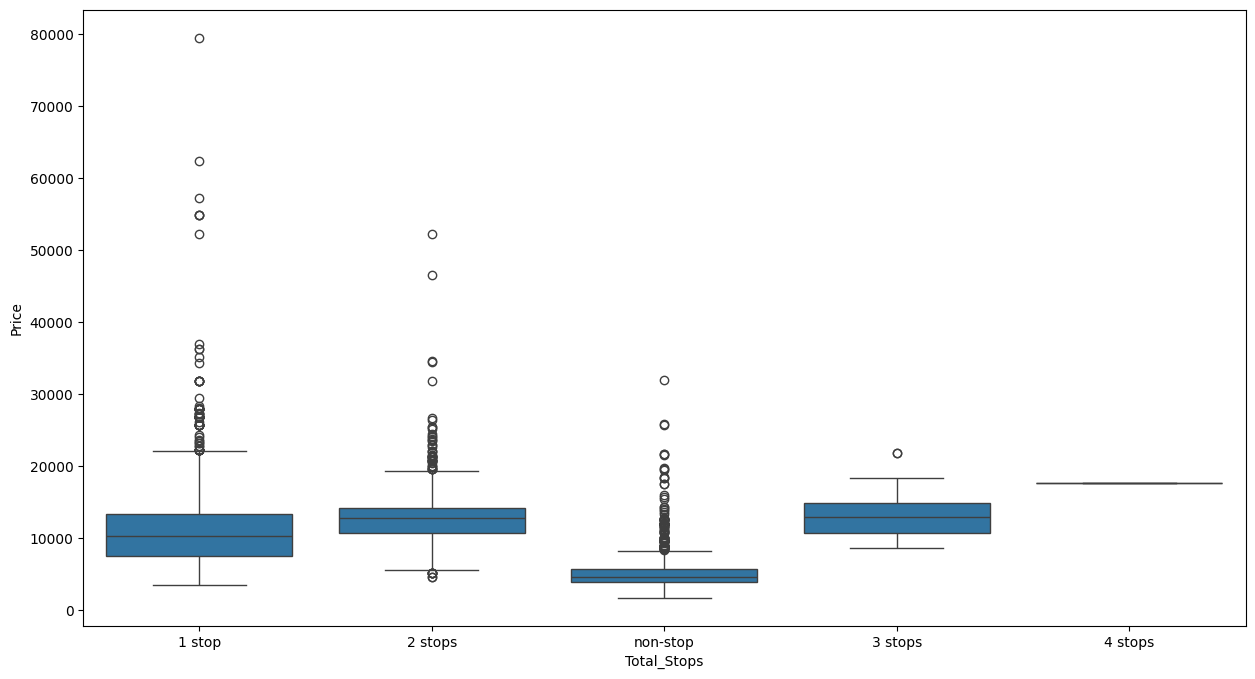

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [ ]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
categorical['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


<Figure size 1500x1500 with 0 Axes>

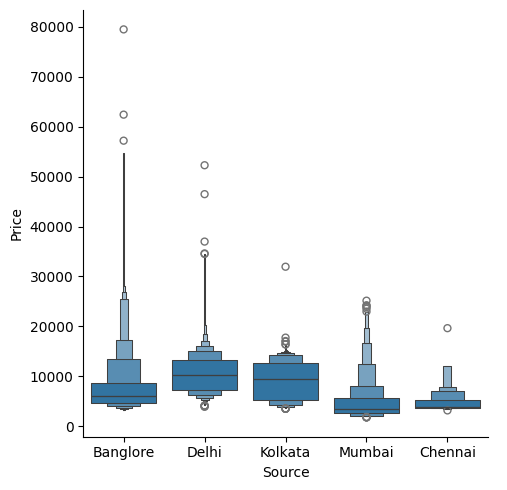

In [ ]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [ ]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()


,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [ ]:
categorical['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


<Axes: xlabel='Destination', ylabel='Price'>

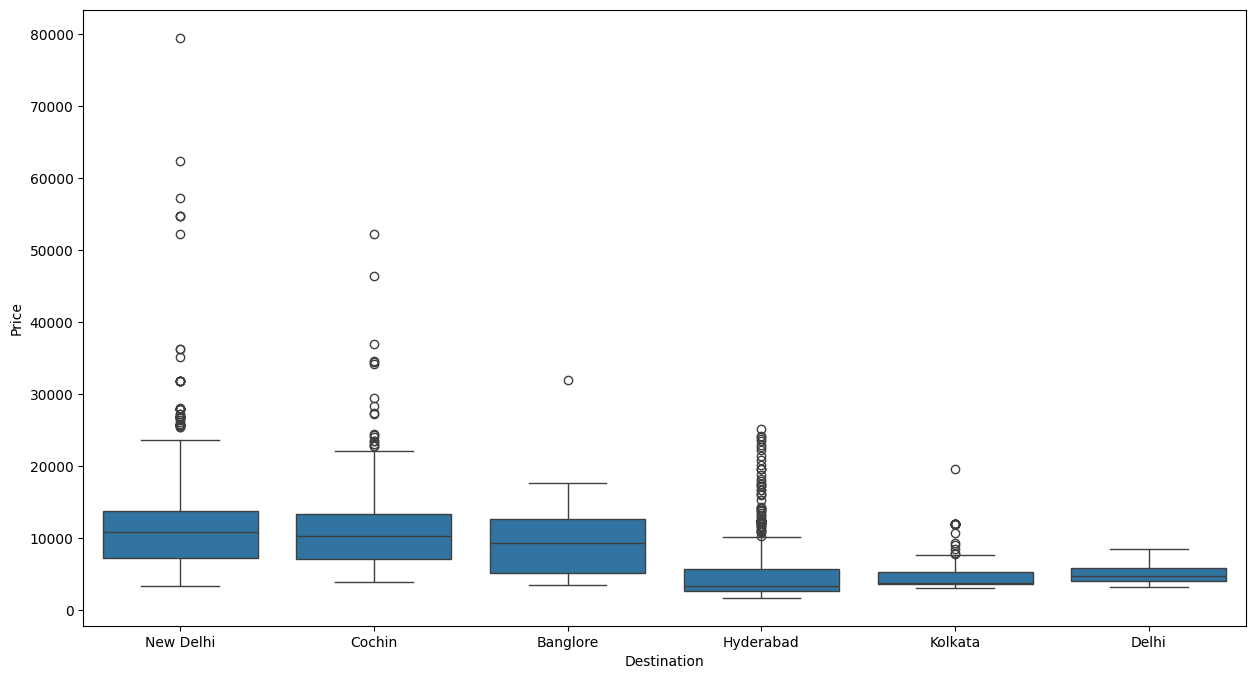

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

# Encoding the needed columns

In [ ]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [ ]:
# now work on route column
categorical['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → VTZ → BLR,1
CCU → IXZ → MAA → BLR,1
BOM → COK → MAA → HYD,1


In [ ]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
drop_col(categorical,'Route')

In [ ]:
categorical.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,3491
Route4,9116
Route5,10636


In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [ ]:
categorical.isnull().sum()


,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,0
Route4,0
Route5,0


In [ ]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<Axes: xlabel='Arrival_Time_hour', ylabel='Price'>

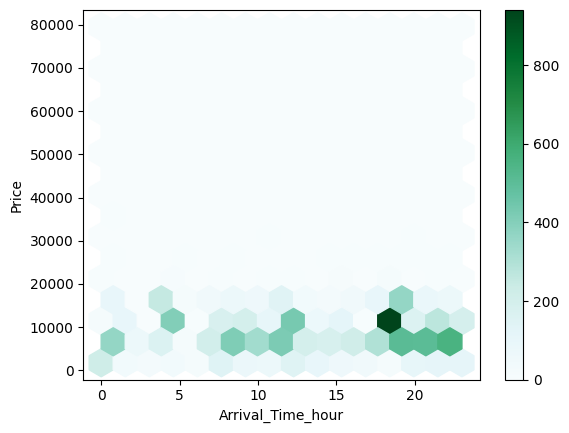

In [ ]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [ ]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [ ]:
drop_col(categorical,'Additional_Info')

In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [ ]:
categorical['Total_Stops']

,Total_Stops
0,0
1,2
2,2
3,1
4,1
...,...
10678,0
10679,0
10680,0
10681,0


In [ ]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

# Now we will finalize the dataset by checking the columns

In [ ]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [ ]:
final_df.head()


,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,...,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,True,13302,1,3,16,50,21,35,4,45


In [ ]:
final_df.columns

Index(['Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'dur_hour',
       'dur_min'],
      dtype='object')

# Checking For Outliers

In [ ]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

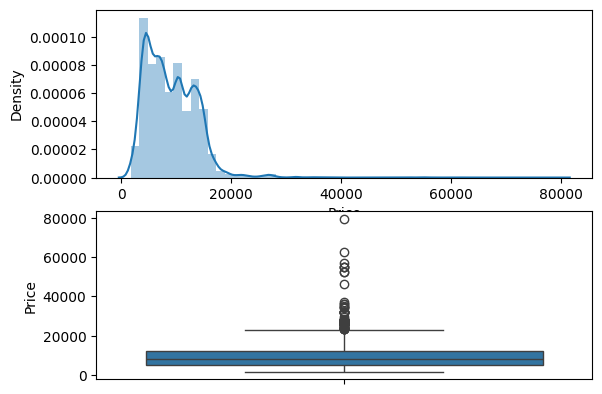

In [ ]:
plot(final_df,'Price')

Handling outliers:
As there is some outliers in price feature,so we replace it with median.

In [ ]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

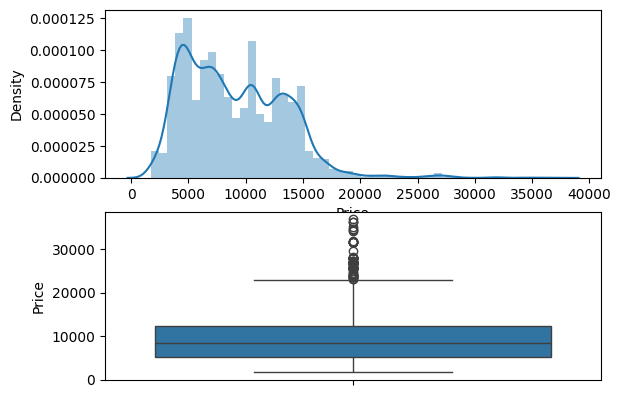

In [ ]:
plot(final_df,'Price')

# Splitting the dataset for training and testing

In [ ]:
X=final_df.drop('Price',axis=1)
y=df['Price']

Feature Selection
It is about finding the best feature and having good relation with independent variable
Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(X,y)

array([1.95838618e+00, 2.26800873e+00, 2.99563097e+00, 2.60517253e+00,
       1.69965108e+00, 1.46358462e+00, 6.83358295e-01, 1.03573043e-01,
       6.49192386e-01, 8.84820271e-01, 7.97369925e-03, 5.27227657e-01,
       1.52844336e-02, 3.16458971e-01, 8.21139054e-04, 2.15997193e-01,
       0.00000000e+00, 1.71093092e-01, 1.42474385e+00, 8.13087610e-01,
       2.87038556e-01, 1.37193835e+00, 3.93003658e-01, 2.82482291e-01,
       1.69139420e-01, 3.41497200e-01, 8.94002289e-01, 1.65800559e+00,
       1.52900255e+00, 1.28664423e+00, 1.90456133e+00, 1.62013753e+00,
       1.75450150e+00, 1.10795639e+00])

In [ ]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.885177
Route1,2.315783
Route2,2.989028
Route3,2.608480
Route4,1.694251
Route5,1.454597
Air India,0.680070
GoAir,0.095674
IndiGo,0.611723
Jet Airways,0.868689


As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

# **Models**

In [ ]:
# Converting a pandas DataFrame to a numpy array
X = X.to_numpy()

# Converting a pandas Series to a numpy array
y = y.to_numpy()


In [ ]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)


In [ ]:
X_train

array([[0, 1, 19, ..., 15, 1, 30],
       [1, 2, 7, ..., 15, 25, 45],
       [1, 3, 7, ..., 35, 13, 55],
       ...,
       [1, 3, 40, ..., 45, 4, 40],
       [2, 3, 34, ..., 15, 37, 20],
       [0, 1, 19, ..., 45, 1, 30]], dtype=object)

In [ ]:
#Lets try few models and see which one is good

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

results = []
#we created a dict where we create objects from different models

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'SVR': SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to suppress output
}

from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# List to store results
results = []

def try_model(model, name):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate R² scores
    train_r2_score = r2_score(y_train, train_preds)
    test_r2_score = r2_score(y_test, test_preds)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    # Store the results in a dictionary
    results.append({
        'Model': name,
        'Train R2 Score': train_r2_score,
        'Test R2 Score': test_r2_score,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })

# Train and test each model
for name, model in models.items():
    try_model(model, name)

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)
df_results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 30
[LightGBM] [Info] Start training from score 9116.657812


,Model,Train R2 Score,Test R2 Score,Train MSE,Test MSE
0,LinearRegression,6.264323e-01,6.603041e-01,8.129735e+06,6.541075e+06
1,Ridge,6.247440e-01,6.571878e-01,8.166475e+06,6.601081e+06
2,SGDRegressor,-3.023280e+10,-3.605004e+10,6.579386e+17,6.941679e+17
3,ElasticNet,5.036239e-01,5.307816e-01,1.080234e+07,9.035118e+06
4,Lasso,6.260581e-01,6.601122e-01,8.137877e+06,6.544770e+06
5,SVR,4.813480e-01,5.145669e-01,1.128712e+07,9.347343e+06
6,GradientBoostingRegressor,7.876496e-01,8.048145e-01,4.621257e+06,3.758429e+06
7,AdaBoostRegressor,2.278720e-01,1.168069e-01,1.680337e+07,1.700648e+07
8,RandomForestRegressor,9.536852e-01,8.376223e-01,1.007921e+06,3.126693e+06
9,DecisionTreeRegressor,9.701124e-01,7.426206e-01,6.504253e+05,4.956015e+06


# Lets apply few models to check the accuracy with model fitting charts

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9532135271968321
Predictions are: [ 8323.54933333 17256.73       13674.22916667 ...  3797.85
  5773.07       10626.18      ]


r2 score is: 0.8404831259968137
MAE:1089.9136406433477
MSE:3071605.490281785
RMSE:1752.5996377615124


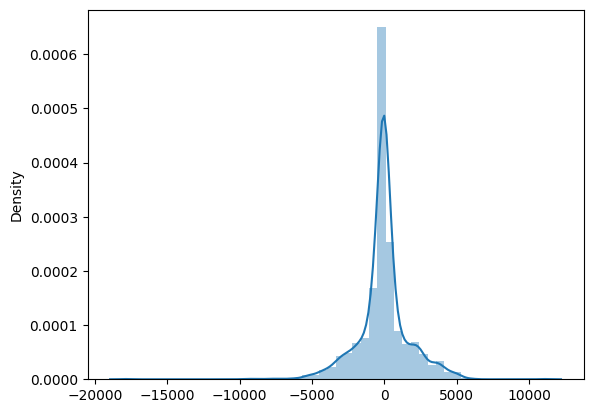

In [ ]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.347571679344646
Predictions are: [14781 15237 10844 ...  4226  7888 10262]


r2 score is: 0.3930514772169186
MAE:1923.796443612541
MSE:11687205.046794571
RMSE:3418.6554442930587


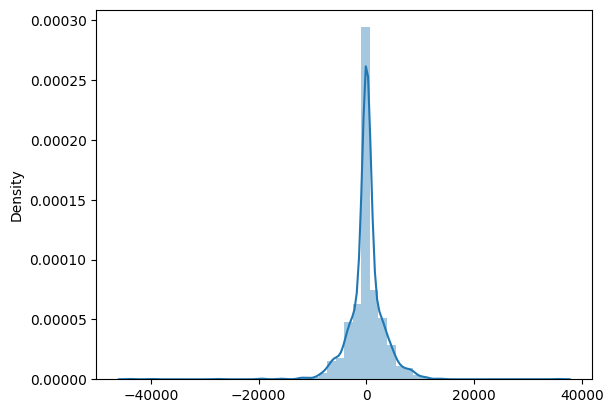

In [ ]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7504397824340925
Predictions are: [ 8355.4 16362.4 12933.2 ...  3757.   8182.6 11232.4]


r2 score is: 0.6691017189783174
MAE:1644.451099672438
MSE:6371670.602639214
RMSE:2524.216829561045


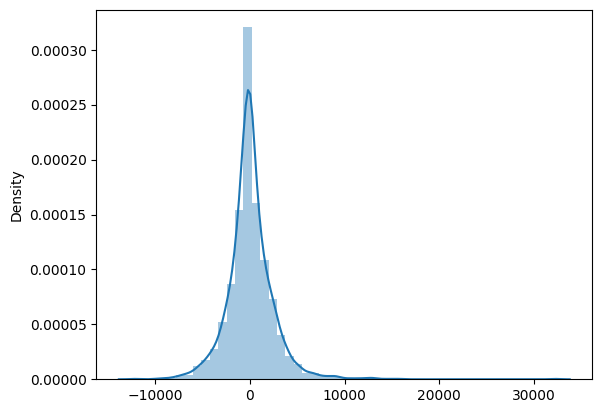

In [ ]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Predictions are: [ 8996. 18550. 14571. ...  3717.  6069. 10262.]


r2 score is: 0.7150684559435101
MAE:1238.1423334893154
MSE:5486549.93741226
RMSE:2342.3385616541987


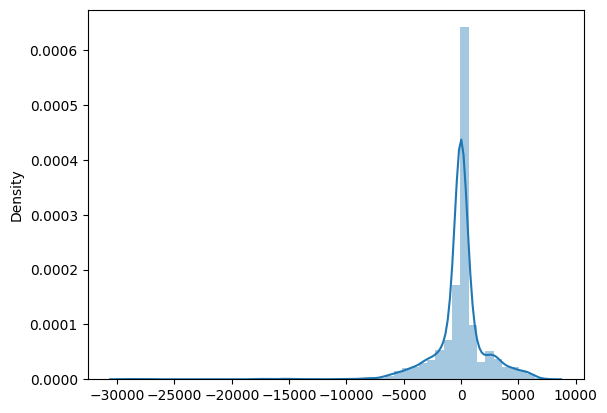

In [ ]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.03692168715331767
Predictions are: [8516.40489669 8265.65249704 8451.37570001 ... 8298.82178087 8460.32416591
 8545.25725503]


r2 score is: 0.0527698349034188
MAE:3326.758076720636
MSE:18239558.628844902
RMSE:4270.779627754739


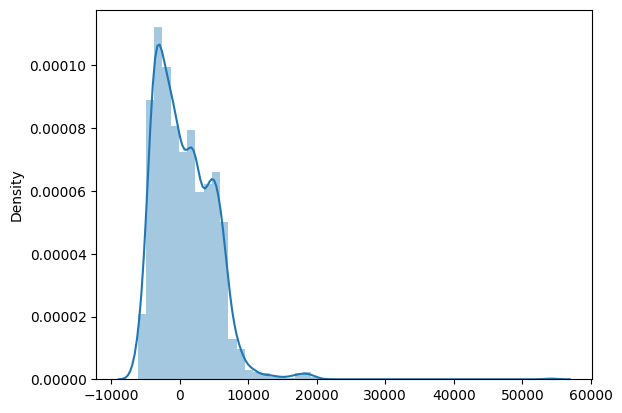

In [ ]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7876495878142
Predictions are: [ 5452.58175724 17020.10179829 11968.38611281 ...  4151.08933122
  6682.83342558 11738.24600723]


r2 score is: 0.8049754885163145
MAE:1439.7830034748188
MSE:3755329.10832271
RMSE:1937.8671544568554


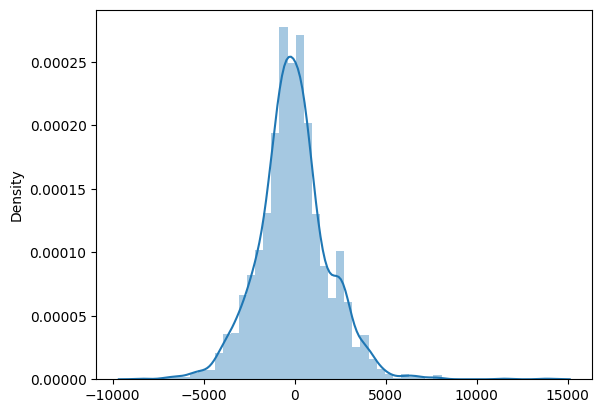

In [ ]:
predict(GradientBoostingRegressor())

# We can see that boosted models gets better R2 scores, but they maybe more prone to overfitting so we will check others models for now. We see that Gradient Boost model gets a R2 score of 0.805 and MAE of 1.4k, but we can try to hypertuning the model for better score

# **Hypertunning the model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 15}

In [ ]:
# best parameter
rf_random.best_params_

{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 15}

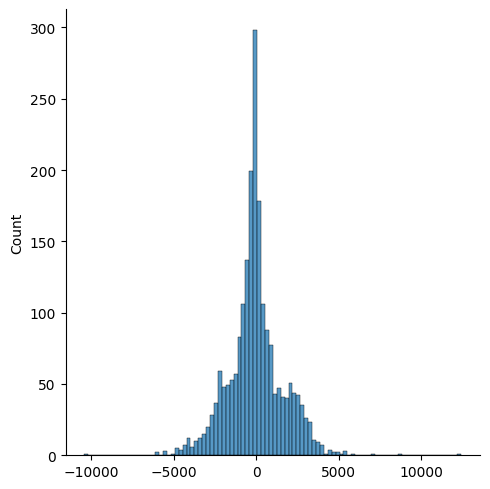

In [ ]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)


In [ ]:
r2_score(y_test,prediction)

0.8552862641787905

# After hypertuning we get a R2 score of 0.855, now we try using neural networks to see if it can fit non linear features

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'dur_hour', 'dur_min'],
      dtype='object')

# Encoding the features for feeding the neural networks

In [ ]:
X=final_df.drop('Price',axis=1)
y=df['Price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)
# One-hot encoding for categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_train.astype('float32')
y_train = y_train.astype('float32')
y_test = y_train.astype('float32')


In [ ]:
X_train.dtypes

,0
Total_Stops,float32
Route1,float32
Route2,float32
Route3,float32
Route4,float32
Route5,float32
Air India,float32
GoAir,float32
IndiGo,float32
Jet Airways,float32


# Creating the a Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=32)
X_train.dtypes

Epoch 1/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 73171704.0000 - mae: 7092.1343
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17967270.0000 - mae: 2933.0220
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15470479.0000 - mae: 2699.8865
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15370691.0000 - mae: 2635.0354
Epoch 5/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14015684.0000 - mae: 2556.9692
Epoch 6/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12592789.0000 - mae: 2427.1550
Epoch 7/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11816714.0000 - mae: 2342.3225
Epoch 8/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11524439.0000 - mae: 2230.8235
Epoch 9/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11057872.0000 - mae: 2154.1707
Epoch 10/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10083349.0000 - mae: 2123.2485
Epoch 11/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8775037.0000 - ma

,0
Total_Stops,float32
Route1,float32
Route2,float32
Route3,float32
Route4,float32
Route5,float32
Air India,float32
GoAir,float32
IndiGo,float32
Jet Airways,float32


In [ ]:
y_pred=model.predict(X_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1461.200439453125
Mean Squared Error (MSE): 4466077.0
Root Mean Squared Error (RMSE): 2113.3095703125
R-squared (R2): 0.7947802257285214


# We see that our R2 score is no better than the previous models, so we will try some other techniques like scaling the features to increase the scores of the previous models

RandomForest R² score: 0.9531
RandomForest MAE: 568.6500, MSE: 1021115.9573, RMSE: 1010.5028

LinearRegression R² score: 0.6264
LinearRegression MAE: 1962.8459, MSE: 8130455.0000, RMSE: 2851.3953

DecisionTree R² score: 0.9701
DecisionTree MAE: 323.1304, MSE: 650425.3482, RMSE: 806.4895

SupportVector R² score: 0.0588
SupportVector MAE: 3399.0794, MSE: 20482920.2183, RMSE: 4525.8060

KNeighbors R² score: 0.8370
KNeighbors MAE: 1124.4778, MSE: 3546520.5000, RMSE: 1883.2208



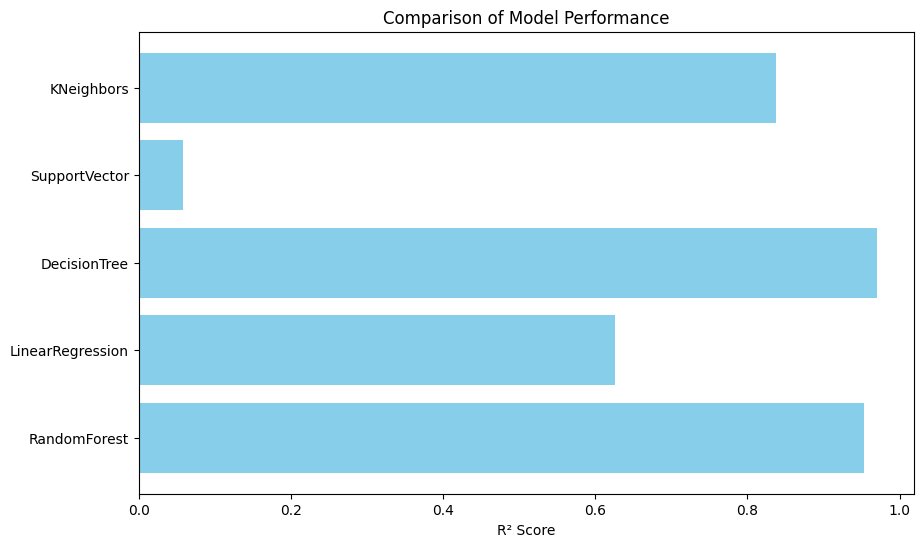

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models to evaluate
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'SupportVector': SVR(),
    'KNeighbors': KNeighborsRegressor()
}

# Dictionary to store the R² scores
r2_scores = {}

# Iterate over each model
for name, model in models.items():
    # For non-tree models, use scaled data
    if name in ['SupportVector', 'KNeighbors', 'LinearRegression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate and store the R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2
    print(f"{name} R² score: {r2:.4f}")

    # Optionally calculate other metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}\n")

# Plotting the R² scores
plt.figure(figsize=(10, 6))
plt.barh(list(r2_scores.keys()), list(r2_scores.values()), color='skyblue')
plt.xlabel('R² Score')
plt.title('Comparison of Model Performance')
plt.show()

# We can see that our model performances have increased significantly after scaling the features and the most accurate ones were Random forest and Decision Trees, with a very low MAE and high R2 score. So we may suspect overfitting. We will now try to add cross validation function to check the authenticity.

In [ ]:

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 1. Cross-validation function
def evaluate_model(model):
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{model.__class__.__name__} CV Score: {cv_score.mean():.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}\n")
    return model

# 2. Hyperparameter tuning for RandomForestRegressor
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
best_rf = evaluate_model(rf_random)

# 3. Hyperparameter tuning for DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=dt_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
best_dt = evaluate_model(dt_random)

# 4. Bagging with DecisionTreeRegressor
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
evaluate_model(bagging)

# 5. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
evaluate_model(gbr)

RandomizedSearchCV CV Score: 0.8018
R² Score: 0.9118
MAE: 811.6756
MSE: 1918832.1254
RMSE: 1385.2192

RandomizedSearchCV CV Score: 0.7322
R² Score: 0.8648
MAE: 1137.5230
MSE: 2941482.7161
RMSE: 1715.0751

BaggingRegressor CV Score: 0.7926
R² Score: 0.9536
MAE: 568.0792
MSE: 1009637.9924
RMSE: 1004.8074

GradientBoostingRegressor CV Score: 0.7717
R² Score: 0.7876
MAE: 1488.6236
MSE: 4621257.3854
RMSE: 2149.7110



GradientBoostingRegressor(random_state=42)

# So we may now conclude that BaggingRegressor has a high R2 score of 0.95 and with high a CV score, which shows it is not overfitting.